In [4]:
from sklearn.datasets import fetch_openml

In [7]:
df = fetch_openml('mnist_784')
df.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X, y = df['data'], df['target']
X[:1].shape, X[:1].ndim

((1, 784), 2)

In [9]:
import numpy as np
some_image = np.array(X[:1]).reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

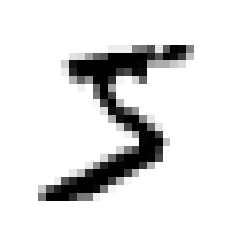

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.imshow(some_image, cmap="binary") # without cmap, your image will be colorful
plt.axis("off") 

In [11]:
X_train, X_test, y_train, y_test = X[:48999], X[49000:], y[:48999], y[49000:]

In [12]:
X_train.shape, X_train.ndim

((48999, 784), 2)

In [13]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=2000, random_state=42) # Increased max_iter from 1000 to 2000 to avoid max iteration reached limit error
sgd.fit(X_train, y_train)

SGDClassifier(max_iter=2000, random_state=42)

In [14]:
sgd.score(X_train, y_train)

0.9022020857568522

In [15]:
sgd_pred = sgd.predict(X_test)
sgd_pred

array(['4', '9', '1', ..., '4', '5', '6'], dtype='<U1')

In [16]:
sgd.score(X_test, y_test)

0.8916666666666667

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone # use clone to copy sgd model

sk_fold = StratifiedKFold(random_state=42, n_splits=3, shuffle=True)
for train_index, test_index in sk_fold.split(X_train, y_train):
    
    X_train_fold, X_test_fold = X_train.loc[train_index], X_train.loc[test_index]
    y_train_fold, y_test_fold = y_train.loc[train_index], y_train.loc[test_index]
    
    sgd_clone = clone(sgd)
    sgd_clone.fit(X_train_fold, y_train_fold)
    y_pred = sgd_clone.predict(X_test_fold)
    correct = sum(y_pred == y_test_fold)
    print(correct/len(y_pred))

0.8894263148227515
0.8486499724484173
0.8807322598420376


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clone, X_train, y_train, cv=3, scoring='accuracy')

array([0.86456866, 0.8465683 , 0.88128329])

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
rf.score(X_train, y_train)

1.0

In [21]:
rf_pred = rf.predict(X_test)
rf_pred

array(['4', '4', '4', ..., '4', '5', '6'], dtype=object)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf_pred)

array([[2054,    1,    3,    0,    0,    1,    5,    1,   10,    3],
       [   0, 2282,    7,    4,    2,    3,    3,    2,    3,    1],
       [   9,    1, 2056,    9,    8,    0,    6,   14,   16,    4],
       [   2,    0,   16, 2077,    0,   21,    0,   14,   18,    7],
       [   2,    7,    4,    0, 1991,    0,    6,    2,    5,   34],
       [   7,    0,    7,   30,    5, 1818,   18,    2,   12,    8],
       [   7,    3,    2,    0,    3,    7, 1992,    0,    7,    0],
       [   2,    9,   34,    5,    6,    0,    0, 2138,    2,   21],
       [   9,    6,   12,   15,    9,   11,    9,    4, 1977,   22],
       [  13,    7,    4,   17,   26,    9,    1,   15,   16, 1959]],
      dtype=int64)

In [23]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [24]:
some_image = np.array(X[:1])
svc_clf.predict(some_image)

array(['5'], dtype=object)

In [25]:
dec_func = svc_clf.decision_function(some_image)
dec_func

array([[ 2.72901919,  2.73334519,  7.25221958,  8.30759275, -0.31076741,
         9.31258766,  0.71154943,  2.7696835 ,  6.22154831,  4.80975061]])

In [26]:
np.argmax(dec_func)

5

In [27]:
svc_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring="accuracy")